# Set up LGBM

In [ ]:
!git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 19007 (delta 9), reused 25 (delta 3), pack-reused 18962
Receiving objects: 100% (19007/19007), 14.89 MiB | 27.18 MiB/s, done.
Resolving deltas: 100% (13863/13863), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Cloning into '/content/LightGBM/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728        
Receiving objects: 100% (21728/21728), 8.51 MiB | 25.62 MiB/s, done.
Resolving deltas: 100% (17565/17565), done.
Submodule path 'compute': checked out '36c89134d4013b2e5e45bc55656a18bd6141995a'


In [ ]:
%cd /content/LightGBM
!mkdir build

/content/LightGBM


In [ ]:
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory: /usr/include
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--

In [ ]:
%cd /content/LightGBM/python-package
!sudo python setup.py install --precompile

/content/LightGBM/python-package
running install
running build
running build_py
INFO:root:Generating grammar tables from /usr/lib/python3.6/lib2to3/Grammar.txt
INFO:root:Generating grammar tables from /usr/lib/python3.6/lib2to3/PatternGrammar.txt
creating build
creating build/lib
creating build/lib/lightgbm
copying lightgbm/sklearn.py -> build/lib/lightgbm
copying lightgbm/compat.py -> build/lib/lightgbm
copying lightgbm/plotting.py -> build/lib/lightgbm
copying lightgbm/__init__.py -> build/lib/lightgbm
copying lightgbm/basic.py -> build/lib/lightgbm
copying lightgbm/callback.py -> build/lib/lightgbm
copying lightgbm/engine.py -> build/lib/lightgbm
copying lightgbm/libpath.py -> build/lib/lightgbm
running egg_info
creating lightgbm.egg-info
writing lightgbm.egg-info/PKG-INFO
writing dependency_links to lightgbm.egg-info/dependency_links.txt
writing requirements to lightgbm.egg-info/requires.txt
writing top-level names to lightgbm.egg-info/top_level.txt
writing manifest file 'lightgbm.

# Download Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/Colab Notebooks/Numerai

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/Numerai'
/content/LightGBM/python-package


In [ ]:
import pandas as pd
import numpy as np
import time

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [ ]:
train_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Numerai/Data/numerai_training_data.csv')
val_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Numerai/Data/numerai_validation_data.csv')

TARGET_NAME = f"target_kazutsugi"
PREDICTION_NAME = f"prediction"
feature_names = [f for f in train_df.columns if f.startswith("feature")]

train_df[feature_names] = train_df[feature_names].astype(np.float16)
train_df[TARGET_NAME] = train_df[TARGET_NAME].astype(np.float16)
val_df[feature_names] = val_df[feature_names].astype(np.float16)
val_df[TARGET_NAME] = val_df[TARGET_NAME].astype(np.float16)

In [ ]:
def score(df):
    pct_ranks = df[PREDICTION_NAME].rank(pct=True, method="first")
    targets = df[TARGET_NAME]
    return np.corrcoef(targets, pct_ranks)[0, 1]

In [ ]:
print(train_df.shape)
train_df.head()

(501808, 314)


,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,0.25,0.75,0.75,0.25,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,0.00,1.00,0.25,0.00,0.50,0.25,0.75,0.50,1.00,0.75,0.75,0.5,0.50,0.75,0.5,...,0.75,0.75,0.75,0.50,1.00,1.00,0.50,0.75,0.5,0.25,0.25,0.75,0.50,1.00,0.5,0.75,0.75,0.25,0.50,1.00,0.75,0.50,0.50,1.00,0.25,0.5,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.75
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,0.25,0.50,0.50,0.00,0.50,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,1.00,0.50,0.50,0.50,0.75,0.50,0.50,0.75,0.25,0.50,0.75,0.5,0.25,0.75,0.5,...,0.25,0.25,0.25,1.00,1.00,0.50,0.50,0.50,0.0,0.25,1.00,0.50,1.00,1.00,0.5,0.50,0.50,1.00,0.25,0.75,1.00,0.25,0.25,1.00,0.50,0.5,0.50,0.75,0.75,0.75,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,0.25,0.00,0.25,0.50,1.00,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,0.50,0.75,0.25,0.5,0.50,0.75,0.5,...,0.25,1.00,1.00,1.00,0.50,1.00,1.00,1.00,0.5,1.00,0.00,1.00,1.00,0.50,1.0,0.75,1.00,0.00,0.50,0.75,0.00,1.00,0.50,0.50,0.75,1.0,0.75,1.00,0.25,0.50,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.00
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,0.75,0.25,0.50,0.50,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.50,0.00,0.50,0.50,0.75,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,1.00,0.75,0.75,1.00,0.75,0.75,0.75,1.0,0.75,1.00,0.75,1.00,0.75,1.0,0.00,0.50,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00,0.5,0.75,0.75,1.00,0.75,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.00
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,0.25,0.75,1.00,0.75,0.00,0.00,0.75,0.5,1.00,0.50,0.75,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.75,0.50,0.75,0.25,0.75,0.50,0.5,0.25,0.25,0.75,0.50,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75


# Run LGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
params = {}
params['learning_rate'] = 0.1
params['num_leaves'] = 32
params['min_child_samples'] = 500
params['max_depth'] = 6
params['n_estimators'] = 200
params['device_type'] = 'gpu'
params['boosting_type'] = 'gbdt'
params['metric'] = 'l2'

model = LGBMRegressor(**params)

In [ ]:
start = time.time()

model.fit(train_df[feature_names], train_df[TARGET_NAME])

end = time.time()
print(f"time taken: {end - start}")

time taken: 22.08355402946472


In [ ]:
train_df[PREDICTION_NAME] = model.predict(train_df[feature_names])
val_df[PREDICTION_NAME] = model.predict(val_df[feature_names])

train_correlations = train_df.groupby("era").apply(score)
print(f"On training the correlation has mean {train_correlations.mean()} and std {train_correlations.std()}")

validation_correlations = val_df.groupby("era").apply(score)
print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

On training the correlation has mean 0.21857023725793692 and std 0.02904511420139679
On validation the correlation has mean 0.027169524912600485 and std 0.027747728305783384


# LGBM Regressor Hyperopt


In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import *
from lightgbm import LGBMRegressor

In [ ]:
def objective(parameters):
  params = {'boosting_type': 'gbdt',
            'device_type': 'gpu',
            'metric':'l2',
            'silent': True}

  params['n_estimators'] = int(parameters['n_estimators'])
  params['learning_rate'] = parameters['learning_rate']
  params['num_leaves'] = int(parameters['num_leaves'])
  params['max_depth'] = int(parameters['max_depth'])
  params['min_child_samples'] = int(parameters['min_child_samples'])
  params['colsample_bytree'] = parameters['colsample_bytree']
  params['max_bin'] = int(parameters['max_bin'])

  model = LGBMRegressor(**params)

  start = time.time()
  model.fit(train_df[feature_names], train_df[TARGET_NAME])
  end = time.time()
  print(end - start)

  val_df[PREDICTION_NAME] = model.predict(val_df[feature_names])
  validation_correlations = val_df.groupby("era").apply(score)

  print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

  loss = 1 - validation_correlations.mean()

  return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [ ]:
space = {
    'n_estimators': hp.loguniform('n_estimators', np.log(100), np.log(2000)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.5)),
    'num_leaves': hp.quniform('num_leaves', 4, 200, 4),
    'max_depth': hp.quniform('max_depth', 5, 12, 1),
    'min_child_samples': hp.loguniform('min_child_samples', np.log(100), np.log(10000)),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 1),
    'max_bin': hp.quniform('max_bin', 100, 1000, 10)
}

In [ ]:
trials = Trials()

In [ ]:
start = time.time()
result = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials
)
end = time.time()
print(end - start)

31.575523376464844
On validation the correlation has mean 0.025199997796233588 and std 0.03005300121148193
30.57975149154663
On validation the correlation has mean 0.02381025046133464 and std 0.029152276034729103
32.020108461380005
On validation the correlation has mean 0.023925312593663883 and std 0.02697943043432524
16.22632932662964
On validation the correlation has mean 0.025123746870174577 and std 0.025904929682204744
25.92712092399597
On validation the correlation has mean 0.028818824981774484 and std 0.030352898655637114
23.82252073287964
On validation the correlation has mean 0.027227324515911366 and std 0.03063023417786778
17.897443294525146
On validation the correlation has mean 0.02665161050315608 and std 0.029643593721836052
20.900481700897217
On validation the correlation has mean 0.024841934351597327 and std 0.03044277929937869
45.490745067596436
On validation the correlation has mean 0.02334615511236926 and std 0.02890158810265187
33.8627712726593
On validation the corre

In [ ]:
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Numerai/lgbm_reg_hpt.json', 'w') as f:
    json.dump(trials.results, f)

In [ ]:
df = pd.DataFrame(trials.results)
df.drop(columns=['status'], inplace=True)
df['score'] = df['loss'].apply(lambda x: 1-x)
df.head()

,loss,params,score
0,NaN,NaN,NaN
1,0.974800,"{'boosting_type': 'gbdt', 'device_type': 'gpu', 'metric': 'l2', 'silent': True, 'n_estimators': 480, 'learning_rate': 0.0035523160805196134, 'num_leaves': 76, 'max_depth': 10, 'min_child_samples': 7636, 'colsample_bytree': 0.6437599023945162, 'max_bin': 640}",0.025200
2,0.976190,"{'boosting_type': 'gbdt', 'device_type': 'gpu', 'metric': 'l2', 'silent': True, 'n_estimators': 470, 'learning_rate': 0.0025469903408414764, 'num_leaves': 116, 'max_depth': 7, 'min_child_samples': 6617, 'colsample_bytree': 0.47622798326947324, 'max_bin': 560}",0.023810
3,0.976075,"{'boosting_type': 'gbdt', 'device_type': 'gpu', 'metric': 'l2', 'silent': True, 'n_estimators': 495, 'learning_rate': 0.001585615034156273, 'num_leaves': 128, 'max_depth': 6, 'min_child_samples': 197, 'colsample_bytree': 0.8775387742372345, 'max_bin': 730}",0.023925
4,0.974876,"{'boosting_type': 'gbdt', 'device_type': 'gpu', 'metric': 'l2', 'silent': True, 'n_estimators': 112, 'learning_rate': 0.17533677845203496, 'num_leaves': 36, 'max_depth': 9, 'min_child_samples': 333, 'colsample_bytree': 0.26144248823943084, 'max_bin': 460}",0.025124


In [ ]:
params = df.iloc[df['score'].argmax()]['params']
score = df.iloc[df['score'].argmax()]['score']
print(score)
print(params)

0.031488007224998005
{'boosting_type': 'gbdt', 'device_type': 'gpu', 'metric': 'l2', 'silent': True, 'n_estimators': 407, 'learning_rate': 0.01849851833529957, 'num_leaves': 164, 'max_depth': 10, 'min_child_samples': 3995, 'colsample_bytree': 0.48051429502787024, 'max_bin': 280}


In [ ]:
# model = LGBMRegressor(**params)
# model.fit(train_df[feature_names], train_df[TARGET_NAME])

# train_df[PREDICTION_NAME] = model.predict(train_df[feature_names])
# val_df[PREDICTION_NAME] = model.predict(val_df[feature_names])

train_correlations = train_df.groupby("era").apply(score)
print(f"On training the correlation has mean {train_correlations.mean()} and std {train_correlations.std()}")

validation_correlations = val_df.groupby("era").apply(score)
print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

On training the correlation has mean 0.21931878289110734 and std 0.03296086005317919
On validation the correlation has mean 0.03148803679668891 and std 0.029127530987266337


In [ ]:
train_df.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,prediction
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,0.25,0.75,0.75,0.25,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,0.00,1.00,0.25,0.00,0.50,0.25,0.75,0.50,1.00,0.75,0.75,0.5,0.50,0.75,0.5,...,0.75,0.75,0.50,1.00,1.00,0.50,0.75,0.5,0.25,0.25,0.75,0.50,1.00,0.5,0.75,0.75,0.25,0.50,1.00,0.75,0.50,0.50,1.00,0.25,0.5,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.75,0.488723
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,0.25,0.50,0.50,0.00,0.50,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,1.00,0.50,0.50,0.50,0.75,0.50,0.50,0.75,0.25,0.50,0.75,0.5,0.25,0.75,0.5,...,0.25,0.25,1.00,1.00,0.50,0.50,0.50,0.0,0.25,1.00,0.50,1.00,1.00,0.5,0.50,0.50,1.00,0.25,0.75,1.00,0.25,0.25,1.00,0.50,0.5,0.50,0.75,0.75,0.75,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25,0.482157
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,0.25,0.00,0.25,0.50,1.00,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,0.50,0.75,0.25,0.5,0.50,0.75,0.5,...,1.00,1.00,1.00,0.50,1.00,1.00,1.00,0.5,1.00,0.00,1.00,1.00,0.50,1.0,0.75,1.00,0.00,0.50,0.75,0.00,1.00,0.50,0.50,0.75,1.0,0.75,1.00,0.25,0.50,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.00,0.462215
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,0.75,0.25,0.50,0.50,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.50,0.00,0.50,0.50,0.75,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,0.75,0.75,1.00,0.75,0.75,0.75,1.0,0.75,1.00,0.75,1.00,0.75,1.0,0.00,0.50,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00,0.5,0.75,0.75,1.00,0.75,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.00,0.507321
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,0.25,0.75,1.00,0.75,0.00,0.00,0.75,0.5,1.00,0.50,0.75,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.75,0.50,0.75,0.25,0.75,0.50,0.5,0.25,0.25,0.75,0.50,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75,0.466218


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


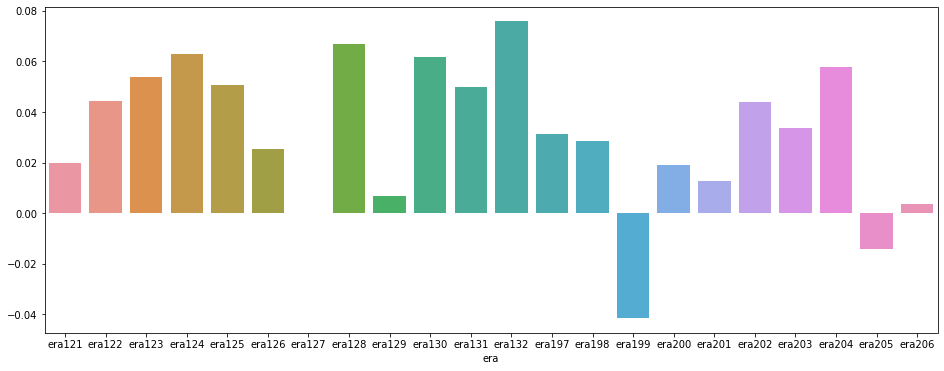

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
sns.barplot(validation_correlations.index, validation_correlations.values)

# LGBM Classifier Hyperopt


In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import *
from lightgbm import LGBMClassifier

In [ ]:
def objective(parameters):
  params = {'boosting_type': 'gbdt',
            'device_type': 'gpu',
            'silent': True}

  params['n_estimators'] = int(parameters['n_estimators'])
  params['learning_rate'] = parameters['learning_rate']
  params['num_leaves'] = int(parameters['num_leaves'])
  params['max_depth'] = int(parameters['max_depth'])
  params['min_child_samples'] = int(parameters['min_child_samples'])
  params['colsample_bytree'] = parameters['colsample_bytree']
  params['max_bin'] = int(parameters['max_bin'])

  model = LGBMClassifier(**params)

  start = time.time()
  model.fit(train_df[feature_names], (train_df[TARGET_NAME]*4).astype(int))
  end = time.time()
  print(end - start)

  val_df[PREDICTION_NAME] = model.predict(val_df[feature_names])/4
  validation_correlations = val_df.groupby("era").apply(score)

  print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

  loss = 1 - validation_correlations.mean()

  return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [ ]:
space = {
    'n_estimators': hp.loguniform('n_estimators', np.log(100), np.log(2000)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.5)),
    'num_leaves': hp.quniform('num_leaves', 4, 200, 4),
    'max_depth': hp.quniform('max_depth', 5, 12, 1),
    'min_child_samples': hp.loguniform('min_child_samples', np.log(100), np.log(10000)),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 1),
    'max_bin': hp.quniform('max_bin', 100, 1000, 10)
}

In [ ]:
trials = Trials()

In [ ]:
start = time.time()
result = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)
end = time.time()
print(end - start)

106.2670590877533
On validation the correlation has mean 0.011861919984775628 and std 0.021250734683162013
143.63146090507507
On validation the correlation has mean 0.013160390613240914 and std 0.014562127886222898
78.23372888565063
On validation the correlation has mean 0.013552838985910228 and std 0.01986481264381705
248.16882705688477
On validation the correlation has mean 0.007215404898925382 and std 0.022940332706428056
403.90214109420776
On validation the correlation has mean 0.012976968861787803 and std 0.02445900285265208
186.47470712661743
On validation the correlation has mean 0.016280458262624455 and std 0.024025898691933927
263.6270091533661
On validation the correlation has mean 0.014820011035044767 and std 0.02579482437121108
64.91533422470093
On validation the correlation has mean 0.019647238576710562 and std 0.021290517950869812
190.71230244636536
On validation the correlation has mean 0.01535636827847467 and std 0.02291067718363487
88.60939431190491
On validation the c

KeyboardInterrupt: ignored

In [ ]:
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Numerai/lgbm_class_hpt.json', 'w') as f:
    json.dump(trials.results, f)

In [ ]:
df = pd.DataFrame(trials.results)
df.drop(columns=['status'], inplace=True)
df['score'] = df['loss'].apply(lambda x: 1-x)
df.head()

,loss,params,score
0,0.988138,"{'boosting_type': 'gbdt', 'device_type': 'gpu', 'silent': True, 'n_estimators': 453, 'learning_rate': 0.01636780567582491, 'num_leaves': 24, 'max_depth': 8, 'min_child_samples': 7116, 'colsample_bytree': 0.9904979443766411, 'max_bin': 430}",0.011862
1,0.986840,"{'boosting_type': 'gbdt', 'device_type': 'gpu', 'silent': True, 'n_estimators': 426, 'learning_rate': 0.4175334041886213, 'num_leaves': 132, 'max_depth': 9, 'min_child_samples': 1378, 'colsample_bytree': 0.6226954736601195, 'max_bin': 270}",0.013160
2,0.986447,"{'boosting_type': 'gbdt', 'device_type': 'gpu', 'silent': True, 'n_estimators': 259, 'learning_rate': 0.09668798987045459, 'num_leaves': 76, 'max_depth': 10, 'min_child_samples': 6110, 'colsample_bytree': 0.46535065175133017, 'max_bin': 650}",0.013553
3,0.992785,"{'boosting_type': 'gbdt', 'device_type': 'gpu', 'silent': True, 'n_estimators': 981, 'learning_rate': 0.00035965175107715663, 'num_leaves': 44, 'max_depth': 7, 'min_child_samples': 5505, 'colsample_bytree': 0.5109368659784517, 'max_bin': 980}",0.007215
4,0.987023,"{'boosting_type': 'gbdt', 'device_type': 'gpu', 'silent': True, 'n_estimators': 1078, 'learning_rate': 0.0017076537587375786, 'num_leaves': 156, 'max_depth': 9, 'min_child_samples': 473, 'colsample_bytree': 0.6480393484385178, 'max_bin': 560}",0.012977


In [ ]:
params = df.iloc[df['score'].argmax()]['params']
score = df.iloc[df['score'].argmax()]['score']
print(score)
print(params)

0.01964723857671058
{'boosting_type': 'gbdt', 'device_type': 'gpu', 'silent': True, 'n_estimators': 177, 'learning_rate': 0.04575447771287509, 'num_leaves': 128, 'max_depth': 9, 'min_child_samples': 2766, 'colsample_bytree': 0.3118853189281864, 'max_bin': 650}


In [ ]:
model = LGBMClassifier(**params)
model.fit(train_df[feature_names], (train_df[TARGET_NAME]*4).astype(int))

train_df[PREDICTION_NAME] = model.predict(train_df[feature_names])/4
val_df[PREDICTION_NAME] = model.predict(val_df[feature_names])/4

train_correlations = train_df.groupby("era").apply(score)
print(f"On training the correlation has mean {train_correlations.mean()} and std {train_correlations.std()}")

validation_correlations = val_df.groupby("era").apply(score)
print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

On training the correlation has mean 0.18710038389279135 and std 0.023639838556514636
On validation the correlation has mean 0.019647238576710562 and std 0.021290517950869812


In [ ]:
train_df.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,prediction
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,0.25,0.75,0.75,0.25,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,0.00,1.00,0.25,0.00,0.50,0.25,0.75,0.50,1.00,0.75,0.75,0.5,0.50,0.75,0.5,...,0.75,0.75,0.50,1.00,1.00,0.50,0.75,0.5,0.25,0.25,0.75,0.50,1.00,0.5,0.75,0.75,0.25,0.50,1.00,0.75,0.50,0.50,1.00,0.25,0.5,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.75,0.50
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,0.25,0.50,0.50,0.00,0.50,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,1.00,0.50,0.50,0.50,0.75,0.50,0.50,0.75,0.25,0.50,0.75,0.5,0.25,0.75,0.5,...,0.25,0.25,1.00,1.00,0.50,0.50,0.50,0.0,0.25,1.00,0.50,1.00,1.00,0.5,0.50,0.50,1.00,0.25,0.75,1.00,0.25,0.25,1.00,0.50,0.5,0.50,0.75,0.75,0.75,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25,0.50
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,0.25,0.00,0.25,0.50,1.00,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,0.50,0.75,0.25,0.5,0.50,0.75,0.5,...,1.00,1.00,1.00,0.50,1.00,1.00,1.00,0.5,1.00,0.00,1.00,1.00,0.50,1.0,0.75,1.00,0.00,0.50,0.75,0.00,1.00,0.50,0.50,0.75,1.0,0.75,1.00,0.25,0.50,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.00,0.50
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,0.75,0.25,0.50,0.50,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.50,0.00,0.50,0.50,0.75,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,0.75,0.75,1.00,0.75,0.75,0.75,1.0,0.75,1.00,0.75,1.00,0.75,1.0,0.00,0.50,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00,0.5,0.75,0.75,1.00,0.75,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.00,1.00
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,0.25,0.75,1.00,0.75,0.00,0.00,0.75,0.5,1.00,0.50,0.75,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.75,0.50,0.75,0.25,0.75,0.50,0.5,0.25,0.25,0.75,0.50,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75,0.25


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


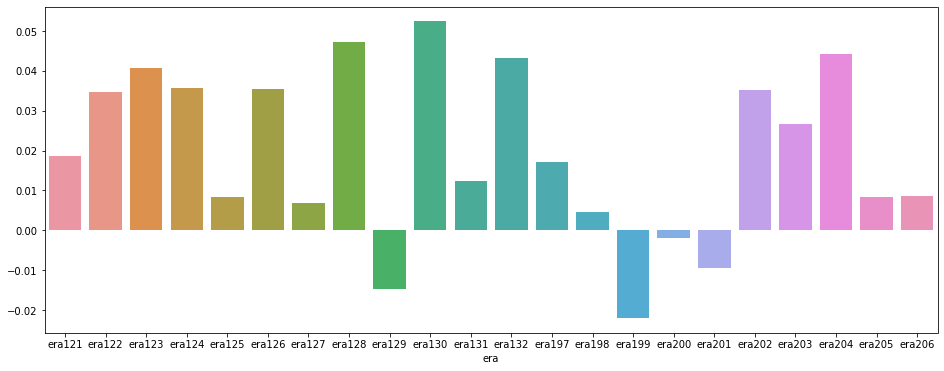

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
sns.barplot(validation_correlations.index, validation_correlations.values)

# XGBoost Regressor Hyperopt


In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import *
from xgboost import XGBRegressor

In [ ]:
def objective(parameters):

  params = {'booster':'gbtree',
            'tree_method': 'gpu_hist',
            'verbosity': 0}

  params['n_estimators'] = int(parameters['n_estimators'])
  params['learning_rate'] = parameters['learning_rate']
  params['gamma'] = parameters['gamma']
  params['max_depth'] = int(parameters['max_depth'])
  params['min_child_weight'] = parameters['min_child_weight']
  params['subsample'] = parameters['subsample']
  params['colsample_bytree'] = parameters['colsample_bytree']
  params['lambda'] = parameters['lambda']
  params['max_bin'] = int(parameters['max_bin'])

  model = XGBRegressor(**params)

  start = time.time()
  model.fit(train_df[feature_names], train_df[TARGET_NAME])
  end = time.time()
  print(end - start)

  val_df[PREDICTION_NAME] = model.predict(val_df[feature_names])
  validation_correlations = val_df.groupby("era").apply(score)

  print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

  loss = 1 - validation_correlations.mean()

  return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [ ]:
space = {
    'n_estimators': hp.loguniform('n_estimators', np.log(100), np.log(3000)),
    'gamma': hp.loguniform('gamma', np.log(0.005), np.log(1)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.5)),
    'max_depth': hp.quniform('max_depth', 4, 10, 1),
    'min_child_weight': hp.uniform('min_child_weight', 0.5, 5),
    'subsample': hp.uniform('subsample', 0.2, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 1),
    'lambda': hp.loguniform('lambda', np.log(0.0001), np.log(0.5)),
    'max_bin': hp.quniform('max_bin', 100, 1000, 10)
}

In [ ]:
trials = Trials()

In [ ]:
start = time.time()
result = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials
)
end = time.time()
print(end - start)

99.86726236343384
On validation the correlation has mean 0.027510448022631827 and std 0.03142292904127624
13.900695562362671
On validation the correlation has mean 0.02243667711253011 and std 0.025952153493407872
200.78064513206482
On validation the correlation has mean 0.008754627692802894 and std 0.01938111134548562
34.33173108100891
On validation the correlation has mean 0.027737690617812574 and std 0.03271089305629976
67.37262153625488
On validation the correlation has mean 0.02670401347654744 and std 0.032325711173991925
30.597564935684204
On validation the correlation has mean 0.026108900707554717 and std 0.030805133525877267
16.160595655441284
On validation the correlation has mean 0.0212151329054049 and std 0.028831177807721122
16.902692556381226
On validation the correlation has mean 0.028208862472095017 and std 0.030128240786367364
13.87581491470337
On validation the correlation has mean 0.024389307342053745 and std 0.029146036794160498
29.235366582870483
On validation the co

In [ ]:
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Numerai/xgb_reg_hpt.json', 'w') as f:
    json.dump(trials.results, f)

In [ ]:
df = pd.DataFrame(trials.results)
df.drop(columns=['status'], inplace=True)
df['score'] = df['loss'].apply(lambda x: 1-x)
df.head()

,loss,params,score
0,NaN,NaN,NaN
1,0.974150,"{'booster': 'gbtree', 'tree_method': 'gpu_hist', 'verbosity': 0, 'n_estimators': 312, 'learning_rate': 0.0006475571515959647, 'gamma': 0.6548576613617999, 'max_depth': 7, 'min_child_weight': 3.236927738108885, 'subsample': 0.5314600591463654, 'colsample_bytree': 0.40967686117905483, 'lambda': 0.042384949204226016, 'max_bin': 290}",0.025850
2,0.989892,"{'booster': 'gbtree', 'tree_method': 'gpu_hist', 'verbosity': 0, 'n_estimators': 1266, 'learning_rate': 0.07395633949843163, 'gamma': 0.6114485285209061, 'max_depth': 9, 'min_child_weight': 1.9373588620814586, 'subsample': 0.5853175523106389, 'colsample_bytree': 0.287845332713453, 'lambda': 0.09709530609204883, 'max_bin': 660}",0.010108
3,0.975404,"{'booster': 'gbtree', 'tree_method': 'gpu_hist', 'verbosity': 0, 'n_estimators': 173, 'learning_rate': 0.19259719831032887, 'gamma': 0.00512917875155783, 'max_depth': 5, 'min_child_weight': 0.736646988609664, 'subsample': 0.7184735708514307, 'colsample_bytree': 0.9559848269452111, 'lambda': 0.0001548450687194401, 'max_bin': 360}",0.024596
4,0.973403,"{'booster': 'gbtree', 'tree_method': 'gpu_hist', 'verbosity': 0, 'n_estimators': 1027, 'learning_rate': 0.002138618347886095, 'gamma': 0.026328855845315323, 'max_depth': 6, 'min_child_weight': 3.5469145273412286, 'subsample': 0.36079801614910845, 'colsample_bytree': 0.5248048222228607, 'lambda': 0.00048791804183930405, 'max_bin': 130}",0.026597


In [ ]:
params = df.iloc[df['score'].argmax()]['params']
score = df.iloc[df['score'].argmax()]['score']
print(score)
print(params)

0.03073521079313357
{'booster': 'gbtree', 'tree_method': 'gpu_hist', 'verbosity': 0, 'n_estimators': 2540, 'learning_rate': 0.003697918107092082, 'gamma': 0.01927310902634947, 'max_depth': 7, 'min_child_weight': 2.888267792416597, 'subsample': 0.7099676352869204, 'colsample_bytree': 0.27941015253988655, 'lambda': 0.03667467985808405, 'max_bin': 970}


In [ ]:
model = XGBRegressor(**params)
model.fit(train_df[feature_names], train_df[TARGET_NAME])

train_df[PREDICTION_NAME] = model.predict(train_df[feature_names])
val_df[PREDICTION_NAME] = model.predict(val_df[feature_names])

train_correlations = train_df.groupby("era").apply(score)
print(f"On training the correlation has mean {train_correlations.mean()} and std {train_correlations.std()}")

validation_correlations = val_df.groupby("era").apply(score)
print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

On training the correlation has mean 0.35688264865265007 and std 0.03113527294512673
On validation the correlation has mean 0.030735210793133516 and std 0.030735656995167285


In [ ]:
train_df.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,prediction
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,0.25,0.75,0.75,0.25,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,0.00,1.00,0.25,0.00,0.50,0.25,0.75,0.50,1.00,0.75,0.75,0.5,0.50,0.75,0.5,...,0.75,0.75,0.50,1.00,1.00,0.50,0.75,0.5,0.25,0.25,0.75,0.50,1.00,0.5,0.75,0.75,0.25,0.50,1.00,0.75,0.50,0.50,1.00,0.25,0.5,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.75,0.487521
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,0.25,0.50,0.50,0.00,0.50,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,1.00,0.50,0.50,0.50,0.75,0.50,0.50,0.75,0.25,0.50,0.75,0.5,0.25,0.75,0.5,...,0.25,0.25,1.00,1.00,0.50,0.50,0.50,0.0,0.25,1.00,0.50,1.00,1.00,0.5,0.50,0.50,1.00,0.25,0.75,1.00,0.25,0.25,1.00,0.50,0.5,0.50,0.75,0.75,0.75,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25,0.490923
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,0.25,0.00,0.25,0.50,1.00,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,0.50,0.75,0.25,0.5,0.50,0.75,0.5,...,1.00,1.00,1.00,0.50,1.00,1.00,1.00,0.5,1.00,0.00,1.00,1.00,0.50,1.0,0.75,1.00,0.00,0.50,0.75,0.00,1.00,0.50,0.50,0.75,1.0,0.75,1.00,0.25,0.50,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.00,0.461140
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,0.75,0.25,0.50,0.50,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.50,0.00,0.50,0.50,0.75,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,0.75,0.75,1.00,0.75,0.75,0.75,1.0,0.75,1.00,0.75,1.00,0.75,1.0,0.00,0.50,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00,0.5,0.75,0.75,1.00,0.75,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.00,0.500107
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,0.25,0.75,1.00,0.75,0.00,0.00,0.75,0.5,1.00,0.50,0.75,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.75,0.50,0.75,0.25,0.75,0.50,0.5,0.25,0.25,0.75,0.50,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75,0.467892


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


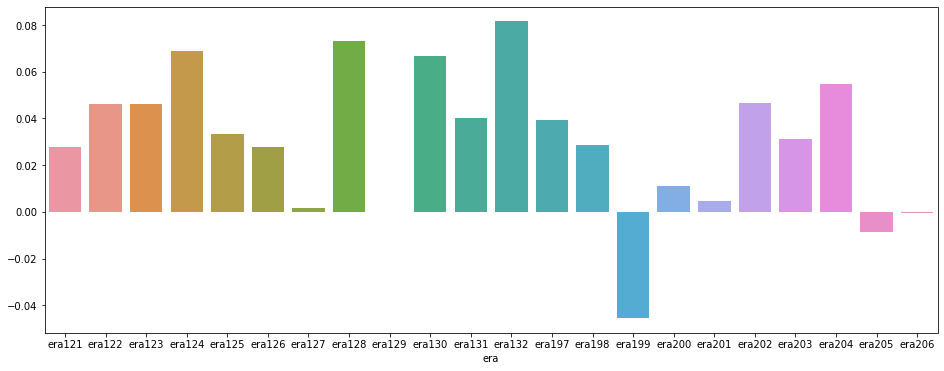

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
sns.barplot(validation_correlations.index, validation_correlations.values)

# XGBoost Classifier Hyperopt


In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import *
from xgboost import XGBClassifier

In [ ]:
def objective(parameters):

  params = {'booster':'gbtree',
            'tree_method': 'gpu_hist',
            'verbosity': 0}

  params['n_estimators'] = int(parameters['n_estimators'])
  params['learning_rate'] = parameters['learning_rate']
  params['gamma'] = parameters['gamma']
  params['max_depth'] = int(parameters['max_depth'])
  params['min_child_weight'] = parameters['min_child_weight']
  params['subsample'] = parameters['subsample']
  params['colsample_bytree'] = parameters['colsample_bytree']
  params['lambda'] = parameters['lambda']
  params['max_bin'] = int(parameters['max_bin'])

  model = XGBClassifier(**params)

  start = time.time()
  model.fit(train_df[feature_names], (train_df[TARGET_NAME]*4).astype(int))
  end = time.time()
  print(end - start)

  val_df[PREDICTION_NAME] = model.predict(val_df[feature_names])/4
  validation_correlations = val_df.groupby("era").apply(score)

  print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

  loss = 1 - validation_correlations.mean()

  return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [ ]:
space = {
    'n_estimators': hp.loguniform('n_estimators', np.log(100), np.log(3000)),
    'gamma': hp.loguniform('gamma', np.log(0.005), np.log(1)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.5)),
    'max_depth': hp.quniform('max_depth', 4, 10, 1),
    'min_child_weight': hp.uniform('min_child_weight', 0.5, 5),
    'subsample': hp.uniform('subsample', 0.2, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 1),
    'lambda': hp.loguniform('lambda', np.log(0.0001), np.log(0.5)),
    'max_bin': hp.quniform('max_bin', 100, 1000, 10)
}

In [ ]:
trials = Trials()

In [ ]:
start = time.time()
result = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)
end = time.time()
print(end - start)

50.46840739250183
On validation the correlation has mean 0.014986360397762993 and std 0.02124030473121226
242.16589999198914
On validation the correlation has mean 0.004255637382748642 and std 0.018373628755056385
127.15269184112549
On validation the correlation has mean 0.018101998832726843 and std 0.022383674963200602
381.13132309913635
On validation the correlation has mean 0.013792797708638489 and std 0.021348947829569222
30.005751609802246
On validation the correlation has mean 0.01343110395524037 and std 0.018595436830604824
496.63443064689636
On validation the correlation has mean 0.011023604023200675 and std 0.02194835074427952
357.1896708011627
On validation the correlation has mean 0.015755130197922153 and std 0.024298610146203523
292.78494000434875
On validation the correlation has mean 0.011132207509164887 and std 0.023422265893126033
177.48762965202332
On validation the correlation has mean 0.015049567325419821 and std 0.023960778060409162
261.5826370716095
On validation t

KeyboardInterrupt: ignored

In [ ]:
import json
with open('/content/gdrive/My Drive/Colab Notebooks/Numerai/xgb_class_hpt.json', 'w') as f:
    json.dump(trials.results, f)

In [ ]:
df = pd.DataFrame(trials.results)
df.drop(columns=['status'], inplace=True)
df['score'] = df['loss'].apply(lambda x: 1-x)
df.head()

,loss,params,score
0,NaN,NaN,NaN
1,0.985014,"{'booster': 'gbtree', 'tree_method': 'gpu_hist', 'verbosity': 0, 'n_estimators': 173, 'learning_rate': 0.08235913442718731, 'gamma': 0.506246103343603, 'max_depth': 6, 'min_child_weight': 1.7286403705506728, 'subsample': 0.823321325418578, 'colsample_bytree': 0.3151258732372993, 'lambda': 0.036988531019224495, 'max_bin': 200}",0.014986
2,0.995744,"{'booster': 'gbtree', 'tree_method': 'gpu_hist', 'verbosity': 0, 'n_estimators': 965, 'learning_rate': 0.00018109829657606327, 'gamma': 0.01550440379547867, 'max_depth': 5, 'min_child_weight': 3.5934804624992984, 'subsample': 0.510201508601587, 'colsample_bytree': 0.5967610605774134, 'lambda': 0.0007464424403550439, 'max_bin': 620}",0.004256
3,0.981898,"{'booster': 'gbtree', 'tree_method': 'gpu_hist', 'verbosity': 0, 'n_estimators': 474, 'learning_rate': 0.02061877001815477, 'gamma': 0.5691087002875216, 'max_depth': 6, 'min_child_weight': 2.294394515865628, 'subsample': 0.48192596142998606, 'colsample_bytree': 0.5327087777101063, 'lambda': 0.030815788190112846, 'max_bin': 460}",0.018102
4,0.986207,"{'booster': 'gbtree', 'tree_method': 'gpu_hist', 'verbosity': 0, 'n_estimators': 1136, 'learning_rate': 0.0004283368678432, 'gamma': 0.007672515524901029, 'max_depth': 7, 'min_child_weight': 0.5943110503607937, 'subsample': 0.5023044892135993, 'colsample_bytree': 0.8795214336918455, 'lambda': 0.00020159377406749762, 'max_bin': 190}",0.013793


In [ ]:
params = df.iloc[df['score'].argmax()]['params']
score = df.iloc[df['score'].argmax()]['score']
print(score)
print(params)

0.019280102812363364
{'booster': 'gbtree', 'tree_method': 'gpu_hist', 'verbosity': 0, 'n_estimators': 894, 'learning_rate': 0.027558619918493503, 'gamma': 0.2278444431258665, 'max_depth': 5, 'min_child_weight': 2.182072385722673, 'subsample': 0.4433269988661285, 'colsample_bytree': 0.3830807888506754, 'lambda': 0.012308282991804533, 'max_bin': 720}


In [ ]:
model = XGBClassifier(**params)
model.fit(train_df[feature_names], (train_df[TARGET_NAME]*4).astype(int))

train_df[PREDICTION_NAME] = model.predict(train_df[feature_names])/4
val_df[PREDICTION_NAME] = model.predict(val_df[feature_names])/4

train_correlations = train_df.groupby("era").apply(score)
print(f"On training the correlation has mean {train_correlations.mean()} and std {train_correlations.std()}")

validation_correlations = val_df.groupby("era").apply(score)
print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

On training the correlation has mean 0.1400473564315141 and std 0.02334044862804631
On validation the correlation has mean 0.01928010281236341 and std 0.023859382474579444


In [ ]:
train_df.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target_kazutsugi,prediction
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,0.25,0.75,0.75,0.25,0.25,1.00,0.75,0.5,1.0,0.5,0.00,0.50,0.50,0.00,0.0,0.00,1.00,0.25,0.00,0.50,0.25,0.75,0.50,1.00,0.75,0.75,0.5,0.50,0.75,0.5,...,0.75,0.75,0.50,1.00,1.00,0.50,0.75,0.5,0.25,0.25,0.75,0.50,1.00,0.5,0.75,0.75,0.25,0.50,1.00,0.75,0.50,0.50,1.00,0.25,0.5,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.75,0.25
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,0.25,0.50,0.50,0.00,0.50,0.00,0.50,0.5,0.5,0.5,0.50,0.25,0.25,0.50,0.0,1.00,0.50,0.50,0.50,0.75,0.50,0.50,0.75,0.25,0.50,0.75,0.5,0.25,0.75,0.5,...,0.25,0.25,1.00,1.00,0.50,0.50,0.50,0.0,0.25,1.00,0.50,1.00,1.00,0.5,0.50,0.50,1.00,0.25,0.75,1.00,0.25,0.25,1.00,0.50,0.5,0.50,0.75,0.75,0.75,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25,0.50
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,0.25,0.00,0.25,0.50,1.00,0.50,0.75,0.5,0.5,1.0,0.50,0.50,0.50,0.25,0.0,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,0.50,0.75,0.25,0.5,0.50,0.75,0.5,...,1.00,1.00,1.00,0.50,1.00,1.00,1.00,0.5,1.00,0.00,1.00,1.00,0.50,1.0,0.75,1.00,0.00,0.50,0.75,0.00,1.00,0.50,0.50,0.75,1.0,0.75,1.00,0.25,0.50,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.00,0.50
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,0.75,0.25,0.50,0.50,0.50,0.75,0.50,1.0,0.5,0.5,0.00,1.00,0.00,0.75,0.0,0.50,0.50,0.50,0.50,0.00,0.50,0.50,0.75,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,1.00,0.75,0.75,1.00,0.75,0.75,0.75,1.0,0.75,1.00,0.75,1.00,0.75,1.0,0.00,0.50,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00,0.5,0.75,0.75,1.00,0.75,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.00,1.00
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.50,0.0,0.5,0.5,0.25,0.00,0.50,0.00,0.5,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.50,0.25,0.5,0.50,0.50,0.5,...,0.25,0.75,1.00,0.75,0.00,0.00,0.75,0.5,1.00,0.50,0.75,0.25,0.50,0.0,0.50,0.50,0.50,0.75,0.75,0.50,0.75,0.25,0.75,0.50,0.5,0.25,0.25,0.75,0.50,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75,0.25


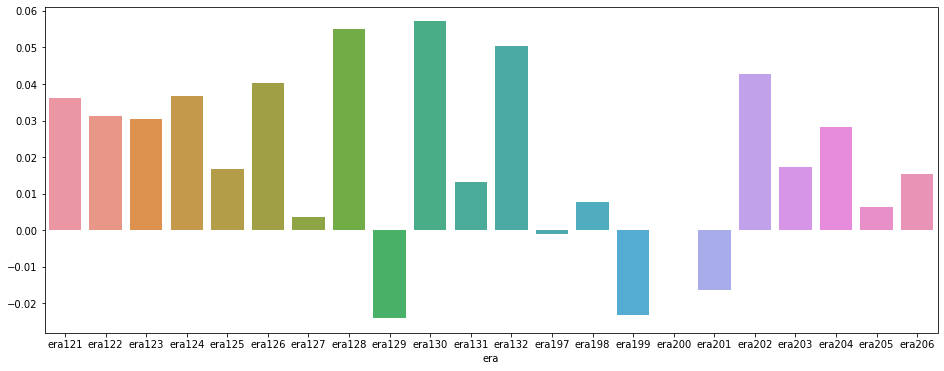

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
sns.barplot(validation_correlations.index, validation_correlations.values)